In [2]:
# Plot a bi-variate distribution manually

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [4]:
# density of multivariate distribution
# works for n dimension
def get_multivariate_distribution(mu, cov_matrix):
    """mu is a vector of mean (dx1) matrix and cov_matrix is a dxd matrix that is invertible"""
    d = np.shape(cov_matrix)[0]
    det_cov_matrix = np.linalg.det(cov_matrix)
    def density(x):
        """x is a dx1 dimensional input"""
        inv_coefficient = (np.power((2.0 * np.pi), (d / 2.0))) * (np.sqrt(det_cov_matrix))
        coefficient = 1.0 / inv_coefficient
        x_minus_mu = x - mu
        x_minus_mu_transpose = np.transpose(x_minus_mu)
        cov_matrix_inverse = np.linalg.inv(cov_matrix)
        power = -0.5 * (np.matmul(x_minus_mu_transpose, np.matmul(cov_matrix_inverse, x_minus_mu))).item(0)
        return coefficient * np.exp(power)
    return density

In [5]:
def plot_2d_distribution(mu, sigma, lower, upper, gap): 
    
    def make_vector(X, Y):
        n = np.shape(X)[0]
        vectors = np.ndarray(shape=(n, n, 2, 1))
        for i in range(n):
            for j in range(n):
                x_comp = X[i][j]
                y_comp = Y[i][j]
                vectors[i][j] = np.array([[x_comp], [y_comp]])
        return vectors
    
    
    def apply_f(xy, f):
        m = np.shape(xy)[0]
        n = np.shape(xy)[1]
        result = np.zeros(shape=(m, n))
        for i in range(m):
            for j in range(n):
                result[i][j] = f(xy[i][j])
        return result


    f = get_multivariate_distribution(mu, sigma)
    X = np.arange(lower, upper, gap)
    Y = np.copy(X)
    X, Y = np.meshgrid(X, Y)
    xy = make_vector(X, Y)
    z = apply_f(xy, f)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}    ')
    fig.colorbar(surf, shrink=1, aspect=10)

    plt.show()

In [6]:
origin = np.array([[0], [0]])

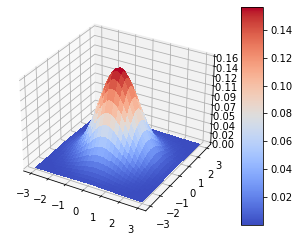

In [7]:
plot_2d_distribution(origin, np.eye(2), -3, 3.01, 0.1)

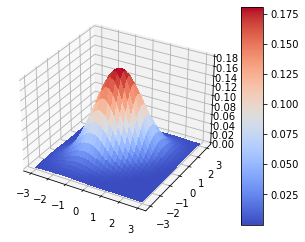

In [8]:
plot_2d_distribution(origin, np.array([[1, 0.5], [0.5, 1]]), -3, 3.01, 0.1)